<b><i>
    Muhammad Aufi Rayesa Frandahana<br/>
    1313617014<br/>
    Expert Systems 112 | Jakarta State University<br/>
    Assignment 1 Task 2 - 3D Transformations
</i></b>

------------------

# 3D Transformation - Basic Rotations

## Introduction

This jupyter notebook consists of the basic object rotation transformation on 3D space. This includes the last 2 options of the rotation methods requested on the task 2, which were axis/angle and quarternion. The transformation demo will be done following this order:

- [Axis/angle method](#Axis/Angle-Method)
- [Quarternion method](#Quarternion-Method)

This code is runnable in python 3.x. The dependencies needed are listed below:

In [17]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph
%matplotlib notebook
#https://gist.github.com/christopherlovell/e3e70880c0b0ad666e7b5fe311320a62
from IPython.display import HTML

#https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import itertools # Array-making helper tool

The code block below initially intended to make the Matplotlib's `Axes3D` figure symmetrical and none of its axes warped or scaled in non-uniform way. Turns out in matplotlib's github, there's an issue about it. They decide to implement `NotImplementedError` to the feature that enables us to scale up the axes in uniform way, because the first implementation was broken. The workaround offered in internet was to roll back to older versions of matplotlib, which is not feasible for me. However, I found out myself that by setting the figure size to the same size for width and length will also make all axes in `Axes3D` symmetrical. Therefore, the below codeblock only functioned to reserve links about that.

In [4]:
#https://github.com/matplotlib/matplotlib/issues/1077/
#https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
#https://python-decompiler.com/article/2012-12/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
#https://github.com/ecell/ecell4/issues/52
#https://github.com/EmilienDupont/augmented-neural-odes/issues/7

Different from the 2D transformation, I have to use three dimensional model to play with instead of image. My colleague did this task with an image anyway by augmenting the coordinates so it is usable in 3D space. I decided that I want to simulate rotations using cube that is centered in the default anchor point, which is (0,0,0). So I made a helper function to generate all coordinates of the cube i desire. Those points will be plotted to `Axes3D` by using their `scatter` method, they will be blue and transparent points. I also generate lines to describe the outlines of the cube that will be plotted using `Axes3D`'s `plot` method, they will be red and opaque points.

In [5]:
def create_box(x0,y0,z0,xlen=0,ylen=0,zlen=0,xn=None,yn=None,zn=None,xspace=1,yspace=1,zspace=1):
    if not xn:
        xn=x0+xlen
    if not yn:
        yn=y0+ylen
    if not zn:
        zn=z0+zlen
    x_ps = list(range(x0,xn,xspace))
    y_ps = list(range(y0,yn,yspace))
    z_ps = list(range(z0,zn,zspace))
    return np.array(list(itertools.product(x_ps,y_ps,z_ps)))

def create_box_line(x0,y0,z0,xlen=0,ylen=0,zlen=0,xn=None,yn=None,zn=None,xspace=1,yspace=1,zspace=1):
    if not xn:
        xn=x0+xlen
    if not yn:
        yn=y0+ylen
    if not zn:
        zn=z0+zlen
    return np.array([
        [x0, y0, z0],
        
        [xn, y0, z0],
        [xn, y0, zn],
        [xn, y0, z0],
        
        [xn, yn, z0],
        [xn, yn, zn],
        [xn, yn, z0],
        
        [x0, yn, z0],
        [x0, yn, zn],
        [x0, yn, z0],
        
        [x0, y0, z0],
        [x0, y0, zn],
        
        [xn, y0, zn],
        [xn, yn, zn],
        [x0, yn, zn],
        [x0, y0, zn]
    ])

Now, I wanted a cube that starts from (-5,-5,-5) to (5,5,5). It is centered on (0,0,0)

In [6]:
x0, y0, z0 = -5, -5, -5
xn, yn, zn = 6, 6, 6
xspace, yspace, zspace = 1, 1, 1
xlim = ((x0 - (xn-x0))*2/3, (xn + (xn-x0))*2/3)
ylim = ((y0 - (yn-y0))*2/3, (yn + (yn-y0))*2/3)
zlim = ((z0 - (zn-z0))*2/3, (zn + (zn-z0))*2/3)


cube_orig = create_box(x0,y0,z0,xn=xn,yn=yn,zn=zn,xspace=xspace,yspace=yspace,zspace=zspace)
cube_orig_x, cube_orig_y, cube_orig_z = zip(*cube_orig)
or_samp_x, or_samp_y, or_samp_z = cube_orig[0]
#https://stackoverflow.com/questions/33287156/specify-color-of-each-point-in-scatter-plot-matplotlib
cseq = np.array([115,169,255,64])/255
c = list(cseq for _ in range(len(cube_orig)))

# I used to do this but it seems like not like what i want:
# https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
cube_orig_line = create_box_line(x0,y0,z0,xn=xn-xspace,yn=yn-yspace,zn=zn-zspace,xspace=xspace,yspace=yspace,zspace=zspace)
cube_orig_line_x, cube_orig_line_y, cube_orig_line_z = zip(*cube_orig_line)

Let's visualize the cube before we start rotating it. For every rotation, I will prepare a new figure just to show it. So when I need the old data to compare with, I still have one.

<IPython.core.display.Javascript object>


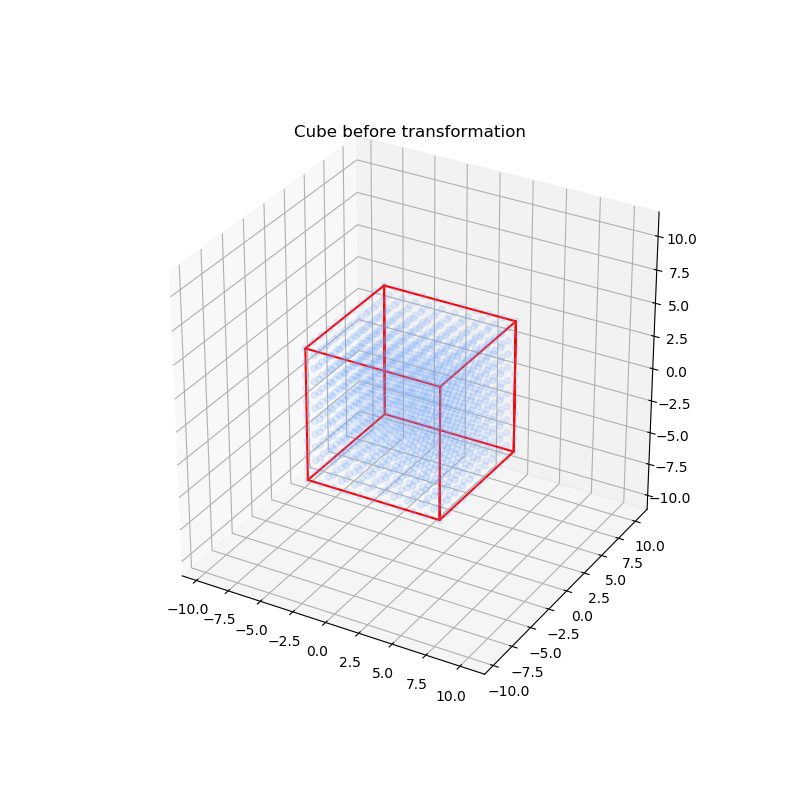

In [7]:
# Creating new visualization figure
f_or = plt.figure(figsize=(8,8))
f_or_ax = f_or.add_subplot(111, projection='3d')

# Plotting the original cube
f_or_ax.scatter(cube_orig_x,cube_orig_y,cube_orig_z,c=c)
f_or_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red')

# Zooming and giving title
f_or_ax.set_xlim(xlim)
f_or_ax.set_ylim(ylim)
f_or_ax.set_zlim(zlim)
f_or_ax.set_title("Cube before transformation")

# Dumping
f_or.savefig("dump/cube_orig.png")
f_or.show()

## Axis/Angle Method

Axis/angle method works by first choosing an arbitrary 3-vector _n̂_ that consists of _\[n̂x, n̂y, n̂z\]_. Then, we will use the plane that is perpendicular to the vector as the plane to decompose any vector points that we want to transform. Whatever you fill in, the magnitude has to be _||n̂|| = 1_. I kind of don't want to have much hassle, so i just drop any values to n̂, then I make the algorithm to normalize it so it follows the magnitude requirement by multiplying _n̂_ with _1/||n̂||_

Then, we'll have to make _\[n̂\]ₓ_ 3x3 matrix operator that we will later use to create the 3x3 rotation transformation matrix and decide the θ. Basically, this is how the theory formulates into code:

In [8]:
nhat=np.array([1,-1,1],dtype=np.float)
nhat*=1/np.linalg.norm(nhat) # nhat assumes ||nhat||=1
nhat_x, nhat_y, nhat_z = nhat

# nhat cross product operator matrix [n̂]_×
nhat_cpo = np.array([
    [0      , -nhat_z, nhat_y ],
    [nhat_z , 0      , -nhat_x],
    [-nhat_y, nhat_x , 0      ]
])

theta=np.pi/6

To create the rotation matrix, we need to follow this formula we often refer as Rodriguez' formula:<br/>
_R(n̂,θ) = I₃ + sin(θ)\[n̂\]ₓ + (1-cos(θ))\[n̂\]ₓ²_

After that, we simply just operate the resulting matrix to the points. I did it twice: the points inside and on the cube and the outlines of the cube

In [19]:
# Axis/angle exponential twist
# R(n̂,θ) = I + sin(θ)[n̂]_× + (1-cos(θ))[n̂]_×²
ax = np.identity(3) + np.sin(theta)*nhat_cpo + (1-np.cos(theta))*(nhat_cpo@nhat_cpo)

#ax_batch = np.array(list(ax for _ in range(len(cube_orig))))
#ax_batch_line = np.array(list(ax for _ in range(len(cube_orig_line))))

cube_axang = np.dot(ax,cube_orig.T).T
cube_axang_x, cube_axang_y, cube_axang_z = zip(*cube_axang)

cube_axang_line = np.dot(ax,cube_orig_line.T).T
cube_axang_line_x, cube_axang_line_y, cube_axang_line_z = zip(*cube_axang_line)

We have finished rotating the matrix, now let's see the result

<IPython.core.display.Javascript object>


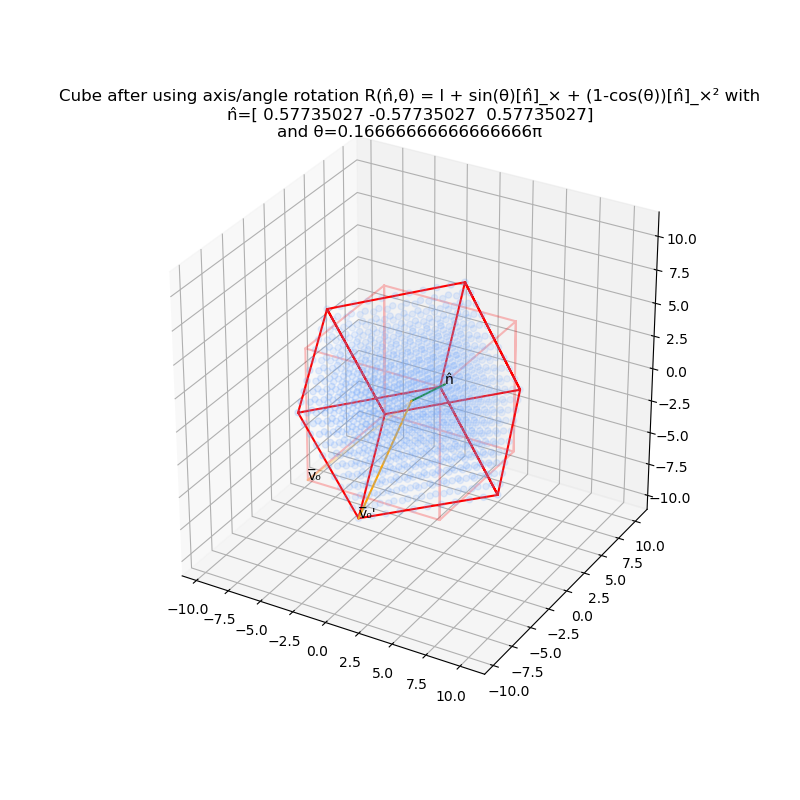

In [21]:
# Creating new visualization figure
f_ax= plt.figure(figsize=(8,8))
f_ax_ax = f_ax.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_ax_ax.scatter(cube_axang_x,cube_axang_y,cube_axang_z,c=c)
f_ax_ax.plot(cube_axang_line_x, cube_axang_line_y, cube_axang_line_z,color='red')
f_ax_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_ax_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_ax_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_ax_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_ax_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
ax_samp_x, ax_samp_y, ax_samp_z = cube_axang[0]
f_ax_ax.plot([0,ax_samp_x],[0,ax_samp_y],[0,ax_samp_z],color='orange')
f_ax_ax.text(ax_samp_x,ax_samp_y,ax_samp_z,"v̅₀'")

# Zooming and giving title
f_ax_ax.set_xlim(xlim)
f_ax_ax.set_ylim(ylim)
f_ax_ax.set_zlim(zlim)
f_ax_ax.set_title(f"Cube after using axis/angle rotation R(n̂,θ) = I + sin(θ)[n̂]_× + (1-cos(θ))[n̂]_×² with\nn̂={str(nhat)}\nand θ={theta/np.pi}π")

# Dumping
f_ax.savefig("dump/cube_axang.png")
f_ax.show()

It does its job. and quite convincing. However, I'm still a little bit skeptical, so I tried the transformation **without** the matrix. I referred the formula from this youtube video:

In [18]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q-ESzg03mQc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [22]:
nhat_batch = np.array(list(nhat for _ in range(len(cube_orig))))
nhat_batch_line = np.array(list(nhat for _ in range(len(cube_orig_line))))

# cos(θ)*v̅ + sin(θ)*(n̂×v̅)
cube_rodri = np.cos(theta)*cube_orig + np.sin(theta)*(np.cross(nhat_batch,cube_orig))
cube_rodri_x, cube_rodri_y, cube_rodri_z = zip(*cube_rodri)

cube_rodri_line = np.cos(theta)*cube_orig_line + np.sin(theta)*(np.cross(nhat_batch_line,cube_orig_line))
cube_rodri_line_x, cube_rodri_line_y, cube_rodri_line_z = zip(*cube_rodri_line)

<IPython.core.display.Javascript object>


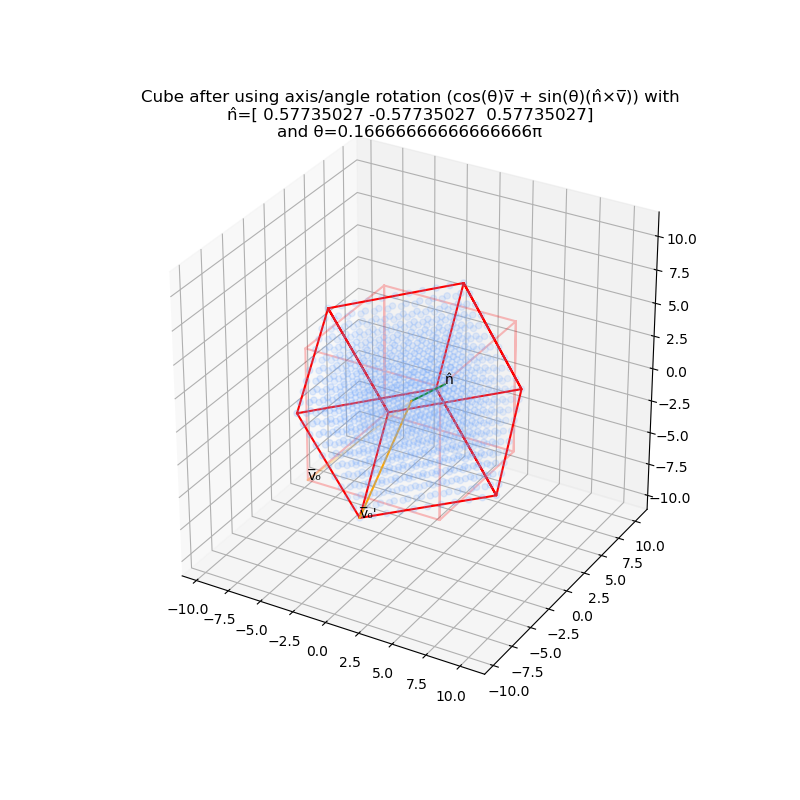

In [23]:
# Creating new visualization figure
f_ro= plt.figure(figsize=(8,8))
f_ro_ax = f_ro.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_ro_ax.scatter(cube_rodri_x,cube_rodri_y,cube_rodri_z,c=c)
f_ro_ax.plot(cube_rodri_line_x, cube_rodri_line_y, cube_rodri_line_z,color='red')
f_ro_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_ro_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_ro_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_ro_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_ro_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
ro_samp_x, ro_samp_y, ro_samp_z = cube_rodri[0]
f_ro_ax.plot([0,ro_samp_x],[0,ro_samp_y],[0,ro_samp_z],color='orange')
f_ro_ax.text(ro_samp_x,ro_samp_y,ro_samp_z,"v̅₀'")

# Zooming and giving title
f_ro_ax.set_xlim(xlim)
f_ro_ax.set_ylim(ylim)
f_ro_ax.set_zlim(zlim)
f_ro_ax.set_title(f"Cube after using axis/angle rotation (cos(θ)v̅ + sin(θ)(n̂×v̅)) with\nn̂={str(nhat)}\nand θ={theta/np.pi}π")

# Dumping
f_ro.savefig("dump/cube_rodri.png")
f_ro.show()

It worrks and looks similar with the rotation I did with matrix. Therefore, case closed.

## Quarternion Method

Quarternion method is just the cooler axis/angle method. We can convert the previous Rodriguez' formula to quarternion. Quarternion needs two inputs, _v = sin(θ/2)n̂_ and _w = cos(θ/2)_. Applying the trigonometrical identities _sin(θ) = 2sin(θ/2)cos(θ/2)_ and _(1-cos(θ)) = 2sin²(θ/2)_ to Rodriguez' formula, we can reduce it so it uses _v_ and _w_ instead. The final formula is _R(v,w) = I₃ + 2w\[w\]ₓ + 2\[w\]ₓ²_ and translates to this:

In [24]:
v = np.sin(theta/2)*nhat
v_x, v_y, v_z = v
v_mat = np.array([
    [0   , -v_z, v_y ],
    [v_z , 0   , -v_z],
    [-v_y, v_x , 0   ]
])

w = np.cos(theta/2)

q_mat = np.identity(3) + (2*w)*v_mat + 2*(v_mat@v_mat)

Now that we have set all the parameters, we'll just have to transform it.

In [25]:
cube_quarter = np.dot(q_mat,cube_orig.T).T
cube_quarter_x, cube_quarter_y, cube_quarter_z = zip(*cube_quarter)

cube_quarter_line = np.dot(q_mat,cube_orig_line.T).T
cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z = zip(*cube_quarter_line)

Then, visualizing it.

<IPython.core.display.Javascript object>


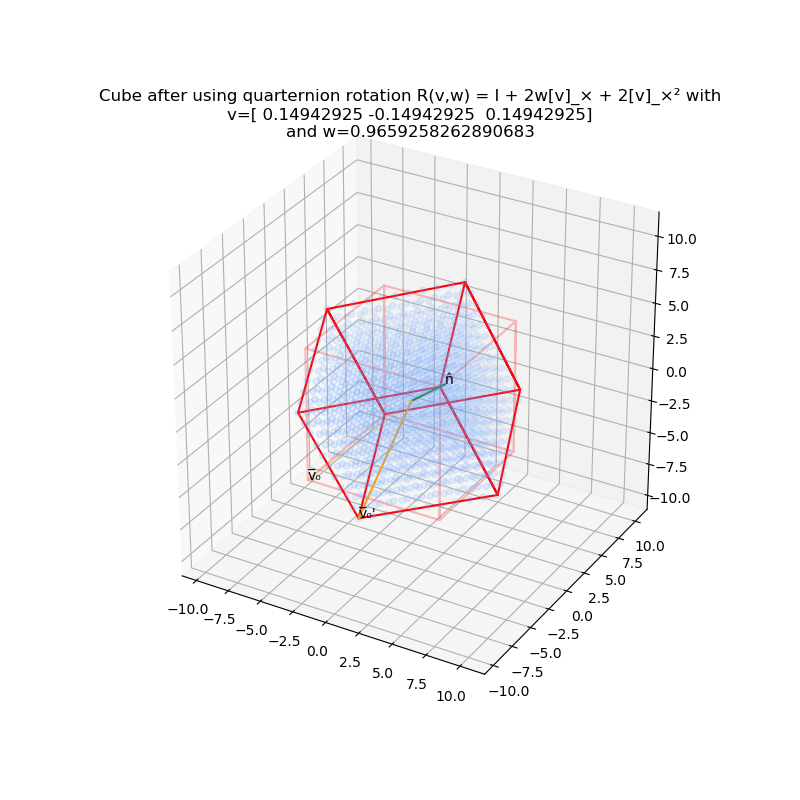

In [26]:
# Creating new visualization figure
f_qu= plt.figure(figsize=(8,8))
f_qu_ax = f_qu.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_qu_ax.scatter(cube_quarter_x,cube_quarter_y,cube_quarter_z,c=c)
f_qu_ax.plot(cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z,color='red')
f_qu_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_qu_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_qu_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_qu_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_qu_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
qu_samp_x, qu_samp_y, qu_samp_z = cube_quarter[0]
f_qu_ax.plot([0,qu_samp_x],[0,qu_samp_y],[0,qu_samp_z],color='orange')
f_qu_ax.text(qu_samp_x,qu_samp_y,qu_samp_z,"v̅₀'")

# Zooming and giving title
f_qu_ax.set_xlim(xlim)
f_qu_ax.set_ylim(ylim)
f_qu_ax.set_zlim(zlim)
f_qu_ax.set_title(f"Cube after using quarternion rotation R(v,w) = I + 2w[v]_× + 2[v]_×² with\nv={str(v)}\nand w={w}")

# Dumping
f_qu.savefig("dump/cube_quarter.png")
f_qu.show()

### Interesting things I found during experimentation

Quarternions does not differ much from axis/axngle in how they rotating. However, Quarternions are able to do multiple rotations at once by multiplying one quarternion to other quarternions. The non-commutative quarter multiplications _q₂ = q₀(v₀,w₀)q₁(v₁,w₁) = (v₀×v₁ + w₀v₁ + w₁v₀, -w₀w₁ - v₀·v₁)_ requires to quarternions, so let's make another quarternion:

In [27]:
nhat_1=np.array([1,1,1],dtype=np.float)
nhat_1*=1/np.linalg.norm(nhat_1) # nhat assumes ||nhat||=1
nhat_1_x, nhat_1_y, nhat_1_z = nhat_1

# nhat cross product operator matrix [n̂]_×
nhat_cpo_1 = np.array([
    [0      , -nhat_1_z, nhat_1_y ],
    [nhat_1_z , 0      , -nhat_1_x],
    [-nhat_1_y, nhat_1_x , 0      ]
])

theta_1=-np.pi/6

v_1 = np.sin(theta_1/2)*nhat_1
v_1_x, v_1_y, v_1_z = v_1
v_mat_1 = np.array([
    [0   , -v_1_z, v_1_y ],
    [v_1_z , 0   , -v_1_z],
    [-v_1_y, v_1_x , 0   ]
])

w_1 = np.cos(theta_1/2)

q_mat_1 = np.identity(3) + (2*w_1)*v_mat_1 + 2*(v_mat_1@v_mat_1)

Now transforming it,

In [28]:
cube_quarter_1 = np.dot(q_mat_1,cube_orig.T).T
cube_quarter_1_x, cube_quarter_1_y, cube_quarter_1_z = zip(*cube_quarter_1)

cube_quarter_line_1 = np.dot(q_mat_1,cube_orig_line.T).T
cube_quarter_line_1_x, cube_quarter_line_1_y, cube_quarter_line_1_z = zip(*cube_quarter_line_1)

And visualizing it,

<IPython.core.display.Javascript object>


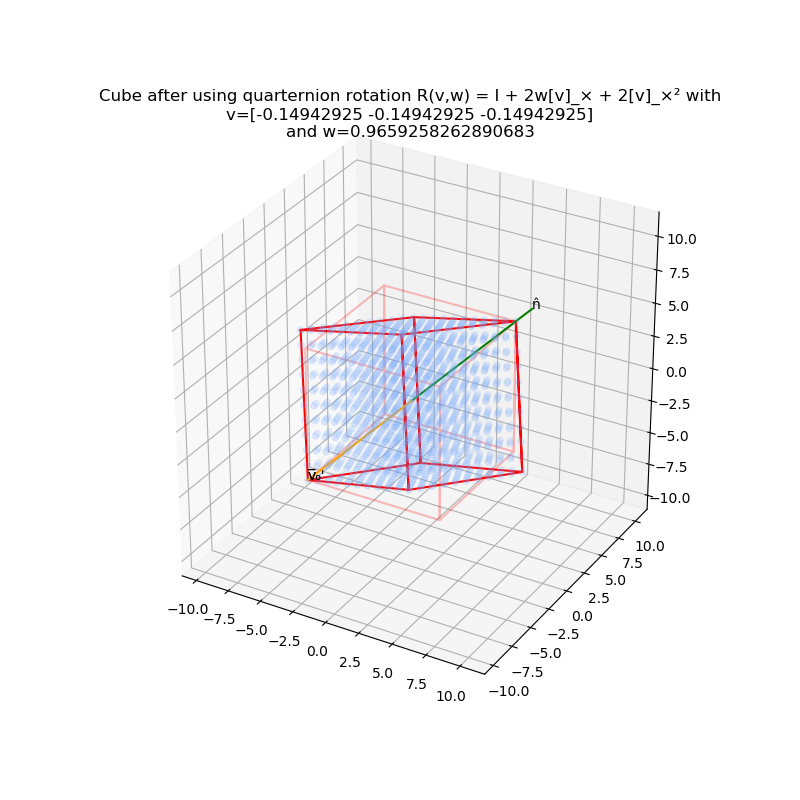

In [29]:
# Creating new visualization figure
f_qu_1= plt.figure(figsize=(8,8))
f_qu_1_ax = f_qu_1.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_qu_1_ax.scatter(cube_quarter_1_x,cube_quarter_1_y,cube_quarter_1_z,c=c)
f_qu_1_ax.plot(cube_quarter_line_1_x, cube_quarter_line_1_y, cube_quarter_line_1_z,color='red')
f_qu_1_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_qu_1_ax.plot([0,nhat_1_x*10],[0,nhat_1_y*10],[0,nhat_1_z*10],color='green')
f_qu_1_ax.text(nhat_1_x*10,nhat_1_y*10,nhat_1_z*10,"n̂")
# fist point vector sample prior to rotation
f_qu_1_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_qu_1_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
qu_samp_1_x, qu_samp_1_y, qu_samp_1_z = cube_quarter_1[0]
f_qu_1_ax.plot([0,qu_samp_1_x],[0,qu_samp_1_y],[0,qu_samp_1_z],color='orange')
f_qu_1_ax.text(qu_samp_1_x,qu_samp_1_y,qu_samp_1_z,"v̅₀'")

# Zooming and giving title
f_qu_1_ax.set_xlim(xlim)
f_qu_1_ax.set_ylim(ylim)
f_qu_1_ax.set_zlim(zlim)
f_qu_1_ax.set_title(f"Cube after using quarternion rotation R(v,w) = I + 2w[v]_× + 2[v]_×² with\nv={str(v_1)}\nand w={w_1}")

# Dumping
f_qu_1.savefig("dump/cube_quarter_1.png")
f_qu_1.show()

And this is how the quarternion multiplication translates. In the end of this codeblock, I try to reverse engineer by myself to find out the θ₂ and then n̂₂ respectively by _θ₂ = 2 * cos'(w₂)_ and _n̂₂ = v / sin(θ₂/2)_ for visualization purposes which translate to this:

In [33]:
v_2 = np.cross(v,v_1) + (w*v_1) + (w_1*v)
v_2_x, v_2_y, v_2_z = v_2
v_mat_2 = np.array([
    [0   , -v_2_z, v_2_y ],
    [v_2_z , 0   , -v_2_z],
    [-v_2_y, v_2_x , 0   ]
])

w_2 = -(w*w_1) - np.dot(v,v_1)

q_mat_2 = np.identity(3) + (2*w_2)*v_mat_2 + 2*(v_mat_2@v_mat_2)

# Inversing, for visualization needs
theta_2 = 2 * np.arccos(w_2)
nhat_2 = v / np.sin(theta_2/2)
nhat_2_x, nhat_2_y, nhat_2_z = nhat_2

Let's transform it

In [34]:
cube_quarter_2 = np.dot(q_mat_2,cube_orig.T).T
cube_quarter_2_x, cube_quarter_2_y, cube_quarter_2_z = zip(*cube_quarter_2)

cube_quarter_line_2 = np.dot(q_mat_2,cube_orig_line.T).T
cube_quarter_line_2_x, cube_quarter_line_2_y, cube_quarter_line_2_z = zip(*cube_quarter_line_2)

And visualizing it

<IPython.core.display.Javascript object>


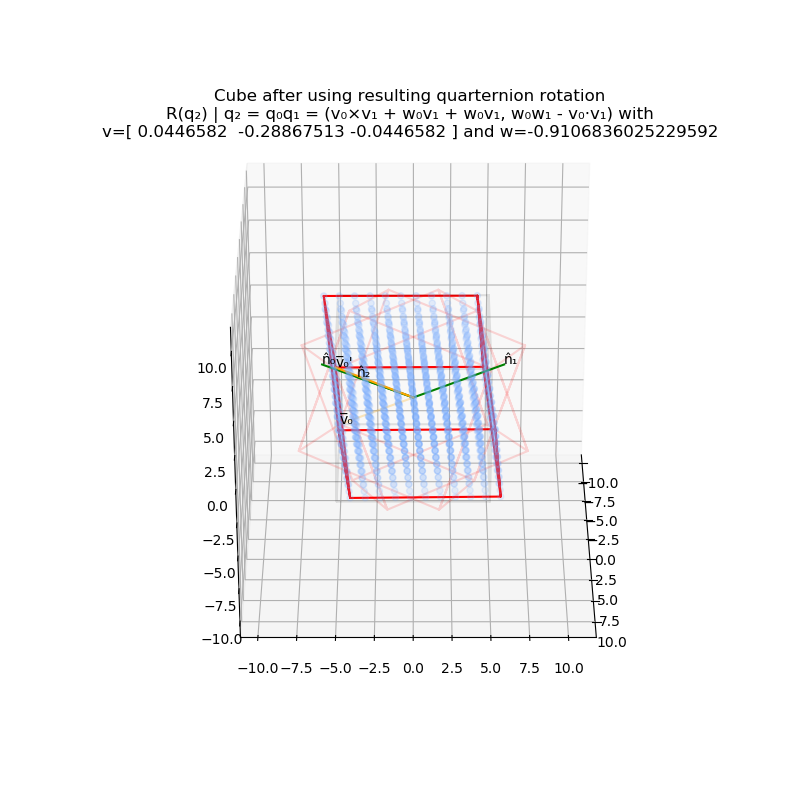

In [35]:
# Creating new visualization figure
f_qu_2= plt.figure(figsize=(8,8))
f_qu_2_ax = f_qu_2.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_qu_2_ax.scatter(cube_quarter_2_x,cube_quarter_2_y,cube_quarter_2_z,c=c)
f_qu_2_ax.plot(cube_quarter_line_2_x, cube_quarter_line_2_y, cube_quarter_line_2_z,color='red')
f_qu_2_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='black',alpha=.10) #Show original
f_qu_2_ax.plot(cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z,color='red',alpha=.15) #Show q0 rotation
f_qu_2_ax.plot(cube_quarter_line_1_x, cube_quarter_line_1_y, cube_quarter_line_1_z,color='red',alpha=.15) #Show q1 rotation

# Showing rotation components
# nhat 0
f_qu_2_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_qu_2_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂₀")
# nhat 1
f_qu_2_ax.plot([0,nhat_1_x*10],[0,nhat_1_y*10],[0,nhat_1_z*10],color='green')
f_qu_2_ax.text(nhat_1_x*10,nhat_1_y*10,nhat_1_z*10,"n̂₁")
# nhat 2
f_qu_2_ax.plot([0,nhat_2_x*10],[0,nhat_2_y*10],[0,nhat_2_z*10],color='green')
f_qu_2_ax.text(nhat_2_x*10,nhat_2_y*10,nhat_2_z*10,"n̂₂")
# fist point vector sample prior to rotation
f_qu_2_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_qu_2_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
qu_samp_2_x, qu_samp_2_y, qu_samp_2_z = cube_quarter_2[0]
f_qu_2_ax.plot([0,qu_samp_2_x],[0,qu_samp_2_y],[0,qu_samp_2_z],color='orange')
f_qu_2_ax.text(qu_samp_2_x,qu_samp_2_y,qu_samp_2_z,"v̅₀'")

# Zooming and giving title
f_qu_2_ax.set_xlim(xlim)
f_qu_2_ax.set_ylim(ylim)
f_qu_2_ax.set_zlim(zlim)
f_qu_2_ax.view_init(azim=0)
f_qu_2_ax.set_title(f"Cube after using resulting quarternion rotation\nR(q₂) | q₂ = q₀q₁ = (v₀×v₁ + w₀v₁ + w₀v₁, w₀w₁ - v₀⋅v₁) with\nv={str(v_2)} and w={w_2}")

# Dumping
f_qu_2.savefig("dump/cube_quarter_2.png")
f_qu_2.show()

#₀₁₂

I was quite shocked to see the result that It is not like what I imagined - and it is also distorted, there must be something wrong. Leave aside the n̂₂ that is probably on the wrong direction, The magnitude of _||n̂₂|| != 1_ too as shown below:

In [40]:
np.linalg.norm(nhat_2)

0.6265218814381279

I have double - even triple - checked that there is no wrong formula at all. This is what the resulting transformation should look like:

In [41]:
cube_quarter_2_alt = np.dot(q_mat_1,np.dot(q_mat,cube_orig.T)).T
cube_quarter_2_alt_x, cube_quarter_2_alt_y, cube_quarter_2_alt_z = zip(*cube_quarter_2_alt)

cube_quarter_line_2_alt = np.dot(q_mat_1,np.dot(q_mat,cube_orig_line.T)).T
cube_quarter_line_2_alt_x, cube_quarter_line_2_alt_y, cube_quarter_line_2_alt_z = zip(*cube_quarter_line_2_alt)

<IPython.core.display.Javascript object>


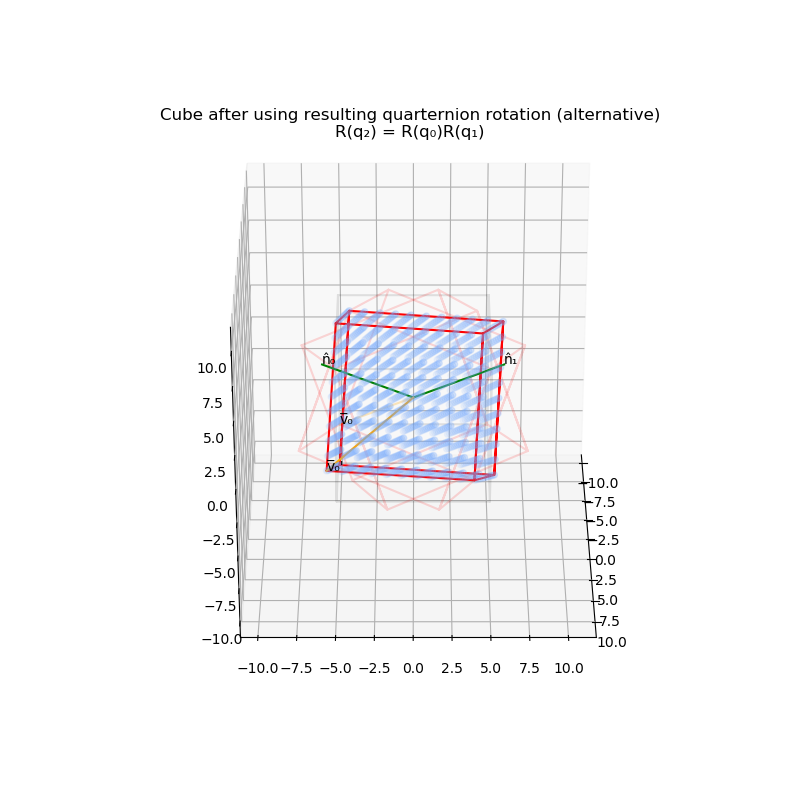

In [43]:
# Creating new visualization figure
f_qu_2_alt= plt.figure(figsize=(8,8))
f_qu_2_alt_ax = f_qu_2_alt.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_qu_2_alt_ax.scatter(cube_quarter_2_alt_x,cube_quarter_2_alt_y,cube_quarter_2_alt_z,c=c)
f_qu_2_alt_ax.plot(cube_quarter_line_2_alt_x, cube_quarter_line_2_alt_y, cube_quarter_line_2_alt_z,color='red')
f_qu_2_alt_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='black',alpha=.10) #Show original
f_qu_2_alt_ax.plot(cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z,color='red',alpha=.15) #Show q0 rotation
f_qu_2_alt_ax.plot(cube_quarter_line_1_x, cube_quarter_line_1_y, cube_quarter_line_1_z,color='red',alpha=.15) #Show q1 rotation

# Showing rotation components
# nhat 0
f_qu_2_alt_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_qu_2_alt_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂₀")
# nhat 1
f_qu_2_alt_ax.plot([0,nhat_1_x*10],[0,nhat_1_y*10],[0,nhat_1_z*10],color='green')
f_qu_2_alt_ax.text(nhat_1_x*10,nhat_1_y*10,nhat_1_z*10,"n̂₁")
# nhat 2 - Hidden because i cannot reverse engineer theta and nhat from rotations that is already applied
#f_qu_2_alt_ax.plot([0,nhat_2_x*10],[0,nhat_2_y*10],[0,nhat_2_z*10],color='green')
#f_qu_2_alt_ax.text(nhat_2_x*10,nhat_2_y*10,nhat_2_z*10,"n̂₂")
# fist point vector sample prior to rotation
f_qu_2_alt_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_qu_2_alt_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
qu_samp_2_alt_x, qu_samp_2_alt_y, qu_samp_2_alt_z = cube_quarter_2_alt[0]
f_qu_2_alt_ax.plot([0,qu_samp_2_alt_x],[0,qu_samp_2_alt_y],[0,qu_samp_2_alt_z],color='orange')
f_qu_2_alt_ax.text(qu_samp_2_alt_x,qu_samp_2_alt_y,qu_samp_2_alt_z,"v̅₀'")

# Zooming and giving title
f_qu_2_alt_ax.set_xlim(xlim)
f_qu_2_alt_ax.set_ylim(ylim)
f_qu_2_alt_ax.set_zlim(zlim)
f_qu_2_alt_ax.view_init(azim=0)
f_qu_2_alt_ax.set_title(f"Cube after using resulting quarternion rotation (alternative)\nR(q₂) = R(q₀)R(q₁)")

# Dumping
f_qu_2_alt.savefig("dump/cube_quarter_2_alt.png")
f_qu_2_alt.show()

#₀₁₂

This leaves me questioning what would have been happening right now. But that would be on another thread. Therefore, this is the end of my report.